# Assignment 3

Welcome to the assignment for week 3.

## Task 3: Hough Transform

There are two datasets available: "images/eye_tracking" and "images/lane_detection". Implement the classical Hough Transform for lines (lane detection) and circles (eye tracking) as shown in the lecture. Use any Canny Edge Detector implementation to produce edge images.

To pass this assignment, we want you to solve (Task 3.1 OR Task 3.2) AND Task 3.3. The BONUS Task 3.4 is optional as well as one of the first 2 tasks. If you are confused, just solve all of them!

In [4]:
# imports
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, feature, color, filters
from matplotlib.patches import Circle
from tqdm.notebook import tqdm
from skimage.draw import line
import math
import numpy as np

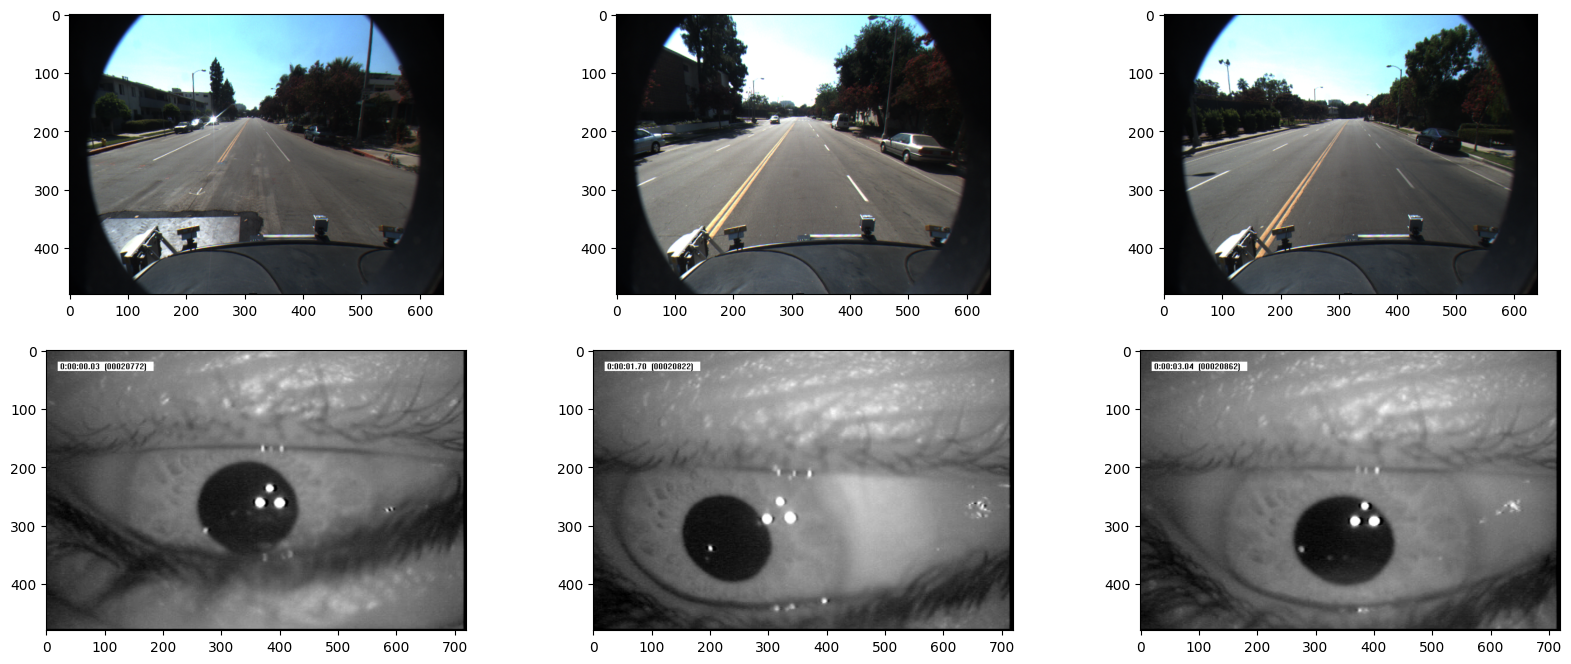

In [19]:
# Plotting some samples
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')
eye1 = io.imread('images/eye_tracking/0000.jpeg')
eye2 = io.imread('images/eye_tracking/0050.jpeg')
eye3 = io.imread('images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(20, 8))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)

ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)
ax21.imshow(eye1)
ax22.imshow(eye2)
ax23.imshow(eye3)

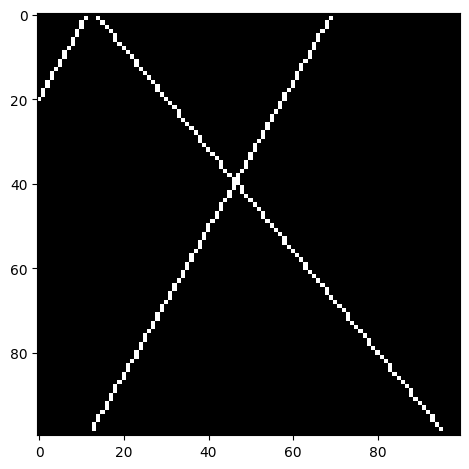

In [18]:
def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 30, 60)
image = draw_line_hessian_normal(image, 30, 10)
image = draw_line_hessian_normal(image, 140, -10)
#image = draw_line_hessian_normal(image, -70, 10)

io.imshow(image)

### Task 3.1: Detecting lanes

Put your Lane Detection solution here.

* Use your implementation of the Hough Transform to find the 10 strongest lines in one lane_detection image
* Display your result set (draw those lines on the image) (**RESULT**)
* Can you improve the performance by limiting the space of solutions?

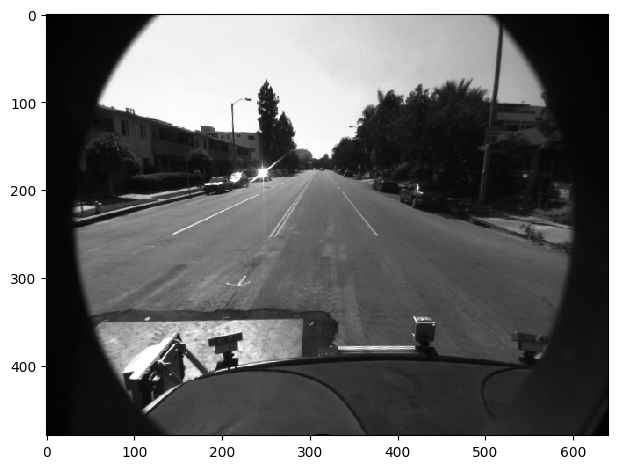

In [15]:
blackwhitelane1 = color.rgb2gray(lane1)
io.imshow(blackwhitelane1)

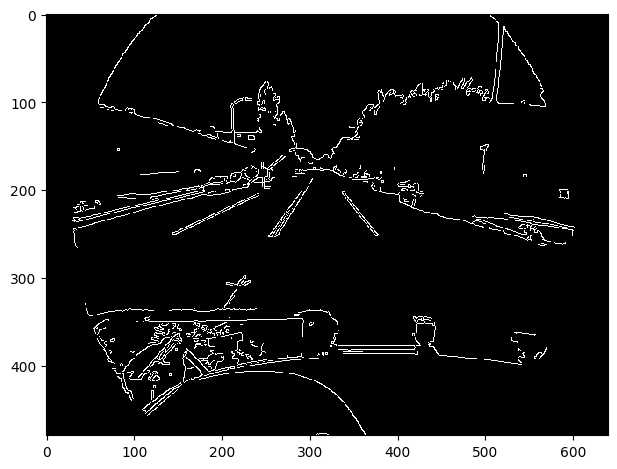

In [22]:
import cv2
def getCanny(pic):
    grayPic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    edgePicture = cv2.Canny(grayPic, 100, 200)

    return edgePicture

mist = getCanny(lane1)
io.imshow(mist)

In [23]:


def getAcc(pic):
    
    edgeLane = getCanny(pic)
    acc={}
    
    # for every pixel, how filter just after active edges? like with np.where > 0
    for y in range(edgeLane.shape[0]):
        for x in range(edgeLane.shape[1]):
            
            if edgeLane[y][x] > 0:
                # ähm, 0 and 180 are difficult to use 
                for angle in range(1,179):
                    
                    #mayby use some sort of bigger buckets !?
                    # r can be neagtive cause of cos
                    a = np.deg2rad(angle) 
                    r = int(x * np.cos(a) + y * np.sin(a))
                    
                    r = (r // 5) * 5
                    
                    if (a,r) not in acc:
                        acc[(angle,r)]=0
                    
                    acc[(angle,r)]+=1
    
    return acc
 
accu = getAcc(lane1)

In [24]:
for (y,x), value in accu.items():
    
    print(x,y, value)
    if x == 10:
        break

print(len(accu.keys()))

125 1 1
125 2 1
125 3 1
125 4 1
125 5 1
125 6 1
125 7 1
125 8 1
125 9 1
125 10 1
120 11 1
120 12 1
120 13 1
120 14 1
120 15 1
120 16 1
120 17 1
120 18 1
120 19 1
115 20 1
115 21 1
115 22 1
115 23 1
115 24 1
115 25 1
110 26 1
110 27 1
110 28 1
110 29 1
105 30 1
105 31 1
105 32 1
105 33 1
105 34 1
100 35 1
100 36 1
100 37 1
100 38 1
95 39 1
95 40 1
95 41 1
90 42 1
90 43 1
90 44 1
85 45 1
85 46 1
85 47 1
80 48 1
80 49 1
80 50 1
75 51 1
75 52 1
75 53 1
70 54 1
70 55 1
70 56 1
65 57 1
65 58 1
65 59 1
60 60 1
60 61 1
55 62 1
55 63 1
55 64 1
50 65 1
50 66 1
45 67 1
45 68 1
45 69 1
40 70 1
40 71 1
35 72 1
35 73 1
35 74 1
30 75 1
30 76 1
25 77 1
25 78 1
20 79 1
20 80 1
15 81 1
15 82 1
15 83 1
10 84 1
20183


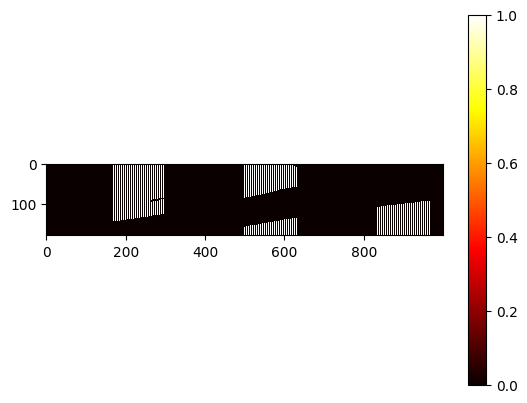

In [25]:
ylen, xlen, _ = lane1.shape
heatmap_data = np.zeros((180, 1000))

for (y, x), value in accu.items():
    heatmap_data[y][x] = value

plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

[(177, -638), (178, -638), (179, -638), (177, -637), (178, -637), (179, -637), (176, -637), (177, -636), (178, -636), (179, -636)]
1
1
1
1
1
1
1
1
1
1


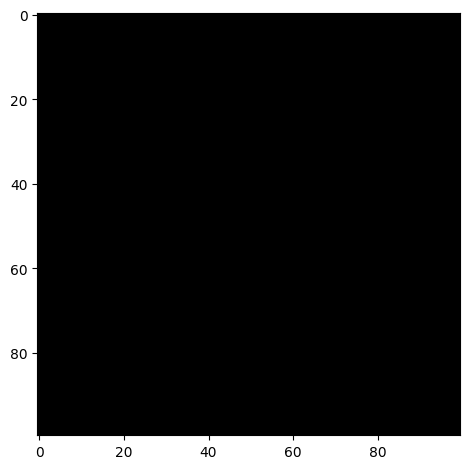

In [77]:
topTen = sorted(accu, key=lambda item: item[1])[:10]
print(topTen) # some very similar coordinate
lineImage = np.zeros((100,100))

for key in topTen:
    
    # print(accu[key]) all one ...
    angle,r = key
    a= np.deg2rad(angle)
    
    lineImage = draw_line_hessian_normal(lineImage, a, r)
    
io.imshow(lineImage)

### Task 3.2: Eye Tracker

Put your Eye Tracker solution here.

* Use your implementation of the Hough Transform to find the 10 strongest circles in one eye_tracking sample image
* Display your result set (draw those circles on the image) (**RESULT**)
* Can you improve the performance by limiting the space of solutions?

In [ ]:
# code here

### Task 3.3: Generalized Hough Transform

* Implement the Generalized Hough Transform as described in the lecture for localizing a given template
* Find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

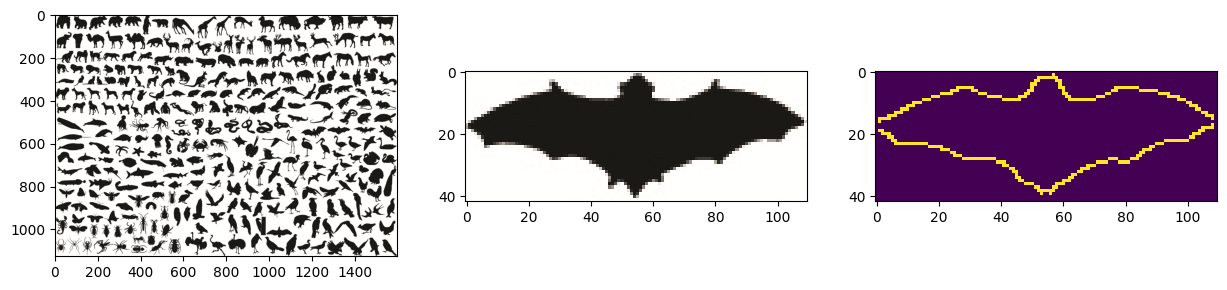

In [5]:
animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

In [63]:
xlen, ylen, _ = bat.shape

bat_center = (ylen // 2, xlen // 2)

grad_x = filters.sobel_v(bat_edge)
grad_y = filters.sobel_h(bat_edge)
gradient_direction = np.arctan2(grad_y, grad_x) 

#build R Table, mapping direction to list of vectors to center
r_table = {}
for y, x in np.argwhere(bat_edge):
    
    direction = gradient_direction[y, x]
    vector_to_center = (bat_center[0] - y, bat_center[1] - x) 
    if direction not in r_table:
        r_table[direction] = []
    r_table[direction].append(vector_to_center)


In [64]:
r_table # seems right I guess, mayby visualize!?

{np.float64(1.5707963267948966): [(np.int64(54), np.int64(-36))],
 np.float64(1.2490457723982544): [(np.int64(53), np.int64(-31)),
  (np.int64(50), np.int64(-5)),
  (np.int64(50), np.int64(-56)),
  (np.int64(49), np.int64(-3)),
  (np.int64(47), np.int64(-25)),
  (np.int64(45), np.int64(9)),
  (np.int64(44), np.int64(11)),
  (np.int64(43), np.int64(13)),
  (np.int64(42), np.int64(15)),
  (np.int64(41), np.int64(17)),
  (np.int64(37), np.int64(-84)),
  (np.int64(35), np.int64(-81)),
  (np.int64(31), np.int64(-67)),
  (np.int64(30), np.int64(-65)),
  (np.int64(25), np.int64(-47)),
  (np.int64(24), np.int64(-45)),
  (np.int64(22), np.int64(-42)),
  (np.int64(20), np.int64(-39)),
  (np.int64(19), np.int64(-37))],
 np.float64(2.356194490192345): [(np.int64(53), np.int64(-32)),
  (np.int64(53), np.int64(-37)),
  (np.int64(50), np.int64(-6)),
  (np.int64(50), np.int64(-57)),
  (np.int64(50), np.int64(-63)),
  (np.int64(49), np.int64(-69)),
  (np.int64(48), np.int64(-14)),
  (np.int64(48), np.i

In [88]:
def GH(image, r_table):
    edges = feature.canny(color.rgb2gray(image), 2)
    grad_x = filters.sobel_v(edges)
    grad_y = filters.sobel_h(edges)
    gradient_direction = np.arctan2(grad_y, grad_x)
    accu = np.zeros((edges.shape[0], edges.shape[1]))

    for y, x in np.argwhere(edges):
        direction = gradient_direction[y, x]
        
        if direction in r_table:
            
            for vector in r_table[direction]:
                #vector 0 is the possible y vector from edge to center s.o.
                center_y = y + vector[0]
                center_x = x + vector[1]
                if 0 <= center_y < accu.shape[0] and 0 <= center_x < accu.shape[1]:
                    accu[center_y][center_x] += 1
    
    return accu

votingCenter = GH(animals, r_table)

In [89]:
votingCenter.shape
votingCenter

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [3., 4., 5., ..., 0., 0., 0.],
       [4., 5., 4., ..., 0., 0., 0.],
       [4., 5., 2., ..., 0., 0., 0.]])

(np.int64(574), np.int64(1292))

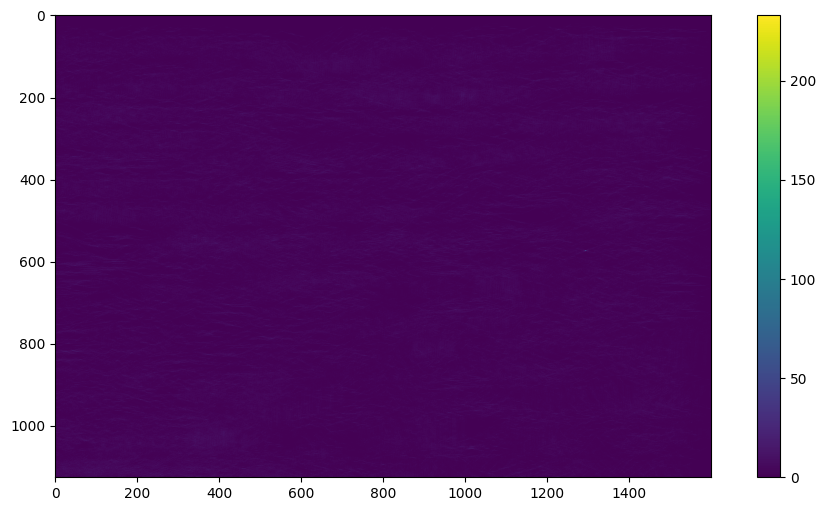

In [95]:
votingCenter.any()
np.argmax(votingCenter)
y, x = np.unravel_index(np.argmax(votingCenter), votingCenter.shape)
# votingCenter[540, 1326]
# mayby heatmap !?
votingCenter.shape

plt.figure(figsize=(12, 6))  # Adjust the figure size (optional)
plt.imshow(votingCenter)  # Plot the array with a colormap
plt.colorbar() # die ist irgendwie broken ...

y, x


<function matplotlib.pyplot.show(close=None, block=None)>

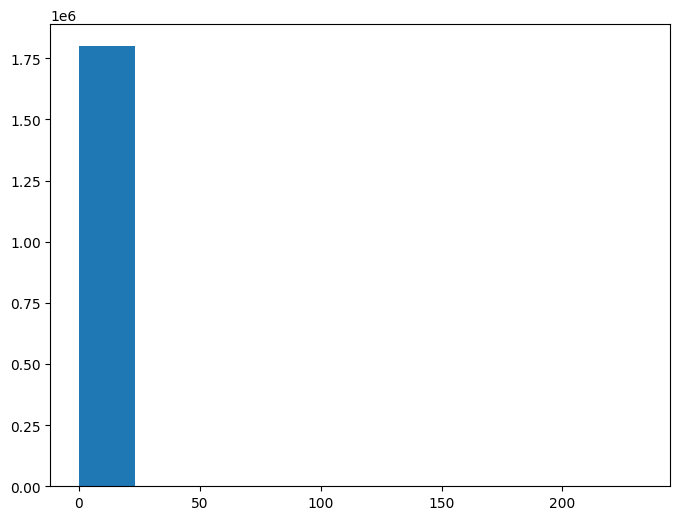

In [92]:
plt.figure(figsize=(8, 6))
v2 =votingCenter.flatten()
plt.hist(v2)
plt.show

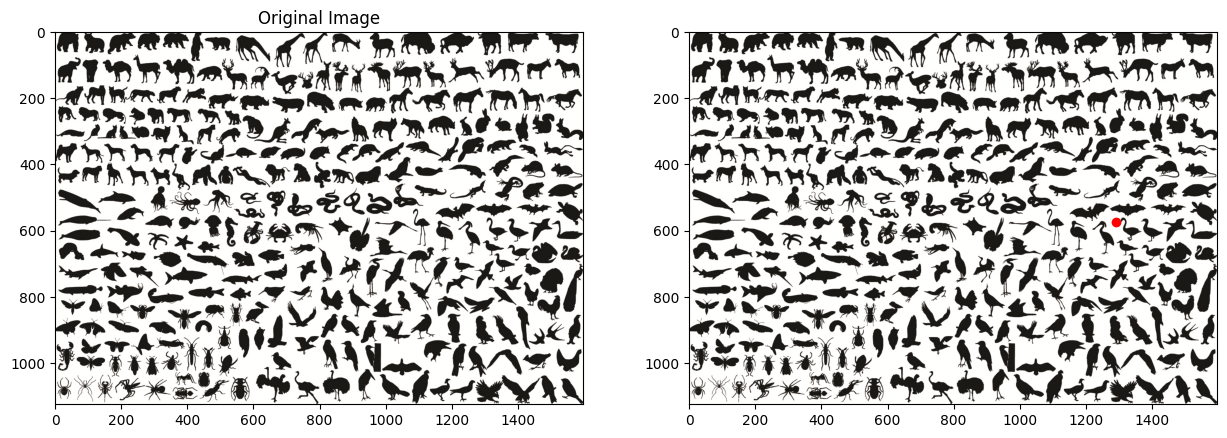

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(animals)
ax[0].set_title("Original Image")
ax[1].imshow(animals)
y, x = np.unravel_index(np.argmax(votingCenter), votingCenter.shape)
ax[1].plot(x, y, 'ro')
# cx, cy = (ymax-ymin)//2+ymin, (xmax-xmin)//2+xmin
# ax[1].plot(cy, cx, 'ro')
# actual solution is on (540, 1326)
plt.show()

### Task 3.4 (BONUS) 
* Implement an extended version of the GHT that find scaled and rotated variants of the template
* Find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.jpg")
* Note that you can binarize your italy template by using a simple color lookup
* Draw the location of italy on the map and print its scale and rotation (**BONUS**)

In [ ]:
# code here

## Congratz, you made it! :)